In [1]:
!pip install pandas matplotlib ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 36.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 38.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.1 MB/s eta 0:00:0000:01
  Using cached ipywidgets-8.1.1-py3-none-any.whl (139 kB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
  Using cached widgetsnbextension-4.0.9-py3-none-any.whl (2.3 MB)
  Using cached jupyterlab_widgets-3.0.9-py3-none-any.whl (214 kB)


In [2]:
%matplotlib widget

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Parameters 
n_values = 10

dbr_reserve_param = [1000000 * (1.5 ** i) for i in range(n_values) if 1000000 * (1.5 ** i) < 5000000] #(start = 1M, end = 5M, step = *1.5)
dola_reserve_param = [100000 * (1.5 ** i) for i in range(n_values) if 100000 * (1.5 ** i) < 1000000] # (start = 100K, end = 1M, step = *1.5)
dbr_rate_per_year_param = [1000000 * (1.5 ** i) for i in range(n_values) if 1000000 * (1.5 ** i) < 5000000] # (start = 1M, end = 5M, step = *1.5)
dola_in_param = [1000 * (1.5 ** i) for i in range(n_values) if 1000 * (1.5 ** i) < 20000]


total_days_param = 7

time_elapsed_range = [60 * 60 * 24 * days for days in range(1, total_days_param+1)]  # 1 to 7 days in seconds

# DataFrame to store results
results = []

# Looping through each combination of parameters
for dbr_reserve_param in (dbr_reserve_param):
    for dola_reserve in (dola_reserve_param):
        for dbr_rate_per_year in (dbr_rate_per_year_param):
            for time_elapsed in time_elapsed_range:
                k = dbr_reserve_param * dola_reserve

                dbr_rate_per_second = dbr_rate_per_year / 365 / 24 / 60 / 60

                dbrs_in = time_elapsed * dbr_rate_per_second
                dbr_reserve = dbr_reserve_param + dbrs_in
                dola_reserve = k / dbr_reserve

                for exact_dola_in in dola_in_param:
                    dbr_out = (exact_dola_in * dbr_reserve) / (dola_reserve + exact_dola_in)
                    
                    # Storing results
                    results.append({
                        "dbr_reserve": float(dbr_reserve),
                        "dola_reserve": float(dola_reserve),
                        "dbr_rate_per_year": float(dbr_rate_per_year),
                        "dbrs_in": float(dbrs_in),
                        "time_elapsed_days": time_elapsed / (60 * 60 * 24),  # Convert seconds back to days for readability
                        "dbr_out": float(dbr_out),
                        "dola_in": float(exact_dola_in),
                        "dbr_price": float(exact_dola_in / dbr_out)
                    })
# Creating DataFrame
df = pd.DataFrame(results)

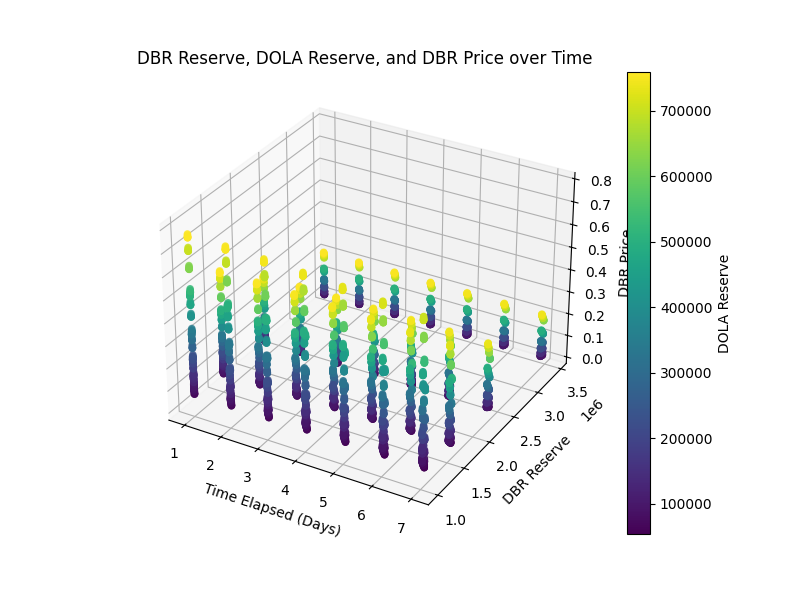

In [4]:

# Chart 1: DBR Reserve, DOLA Reserve, and DBR Price over Time
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111, projection='3d')
scatter1 = ax1.scatter(df['time_elapsed_days'], df['dbr_reserve'], df['dbr_price'], c=df['dola_reserve'], cmap='viridis')
ax1.set_xlabel('Time Elapsed (Days)')
ax1.set_ylabel('DBR Reserve')
ax1.set_zlabel('DBR Price')
plt.colorbar(scatter1, ax=ax1, label='DOLA Reserve')
plt.title('DBR Reserve, DOLA Reserve, and DBR Price over Time')
plt.show()

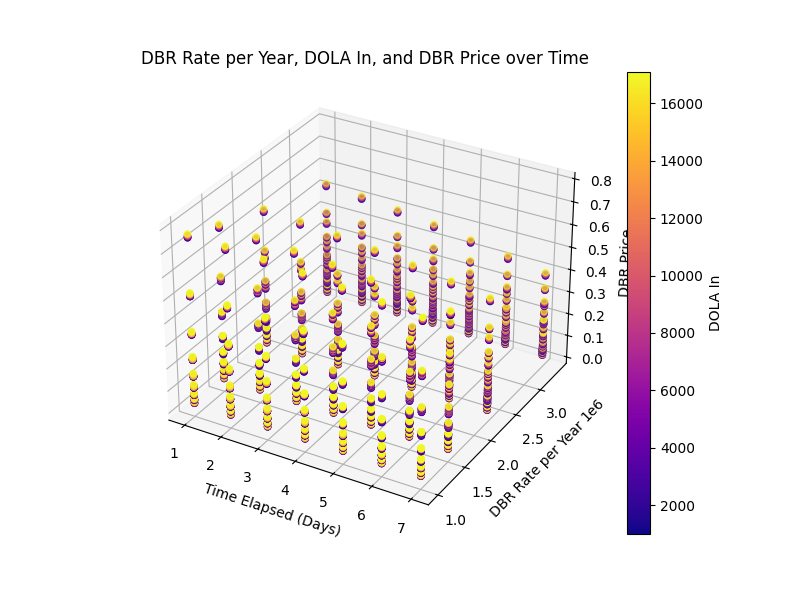

In [5]:
# Chart 2: DBR Rate per Year, DOLA In, and DBR Price over Time
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111, projection='3d')
scatter2 = ax2.scatter(df['time_elapsed_days'], df['dbr_rate_per_year'], df['dbr_price'], c=df['dola_in'], cmap='plasma')
ax2.set_xlabel('Time Elapsed (Days)')
ax2.set_ylabel('DBR Rate per Year')
ax2.set_zlabel('DBR Price')
plt.colorbar(scatter2, ax=ax2, label='DOLA In')
plt.title('DBR Rate per Year, DOLA In, and DBR Price over Time')
plt.show()

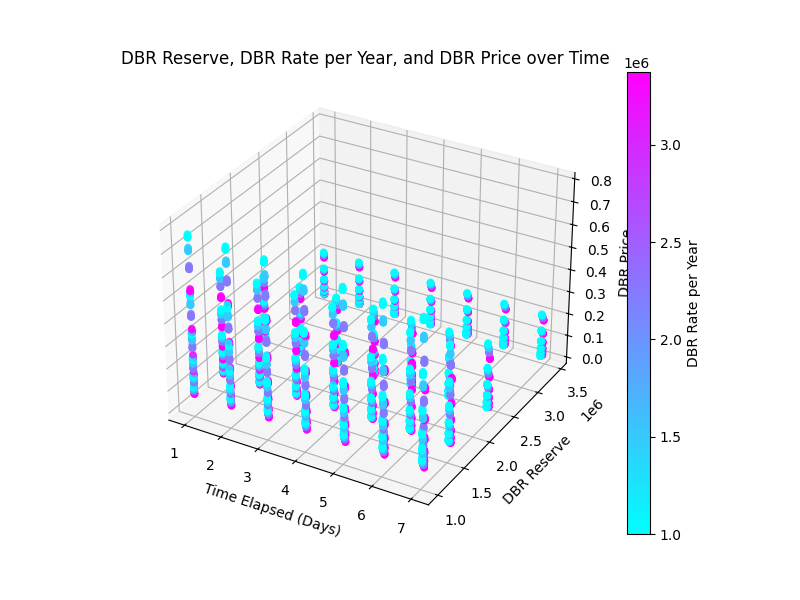

In [6]:
# Chart 3: DBR Reserve, DBR Rate per Year, and DBR Price over Time
fig3 = plt.figure(figsize=(8, 6))
ax3 = fig3.add_subplot(111, projection='3d')
scatter3 = ax3.scatter(df['time_elapsed_days'], df['dbr_reserve'], df['dbr_price'], c=df['dbr_rate_per_year'], cmap='cool')
ax3.set_xlabel('Time Elapsed (Days)')
ax3.set_ylabel('DBR Reserve')
ax3.set_zlabel('DBR Price')
plt.colorbar(scatter3, ax=ax3, label='DBR Rate per Year')
plt.title('DBR Reserve, DBR Rate per Year, and DBR Price over Time')
plt.show()

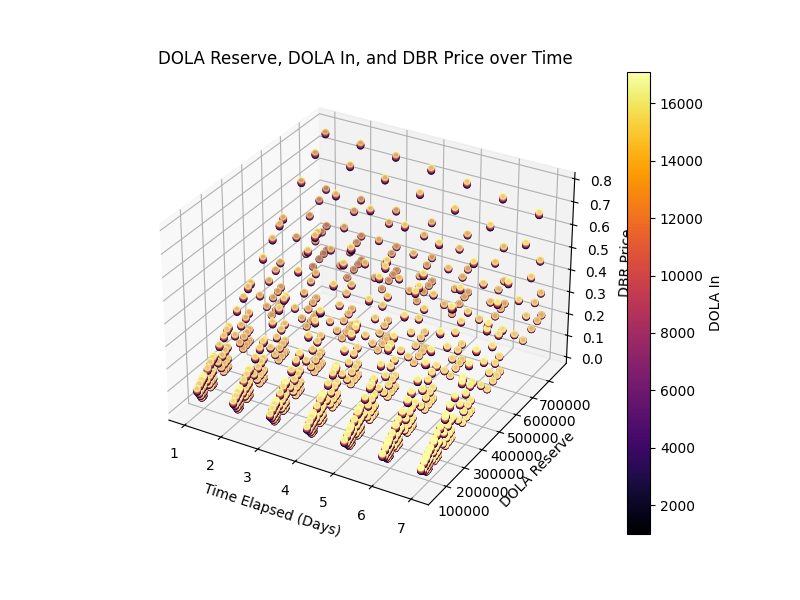

In [7]:
# Chart 4: DOLA Reserve, DOLA In, and DBR Price over Time
fig4 = plt.figure(figsize=(8, 6))
ax4 = fig4.add_subplot(111, projection='3d')
scatter4 = ax4.scatter(df['time_elapsed_days'], df['dola_reserve'], df['dbr_price'], c=df['dola_in'], cmap='inferno')
ax4.set_xlabel('Time Elapsed (Days)')
ax4.set_ylabel('DOLA Reserve')
ax4.set_zlabel('DBR Price')
plt.colorbar(scatter4, ax=ax4, label='DOLA In')
plt.title('DOLA Reserve, DOLA In, and DBR Price over Time')
plt.show()

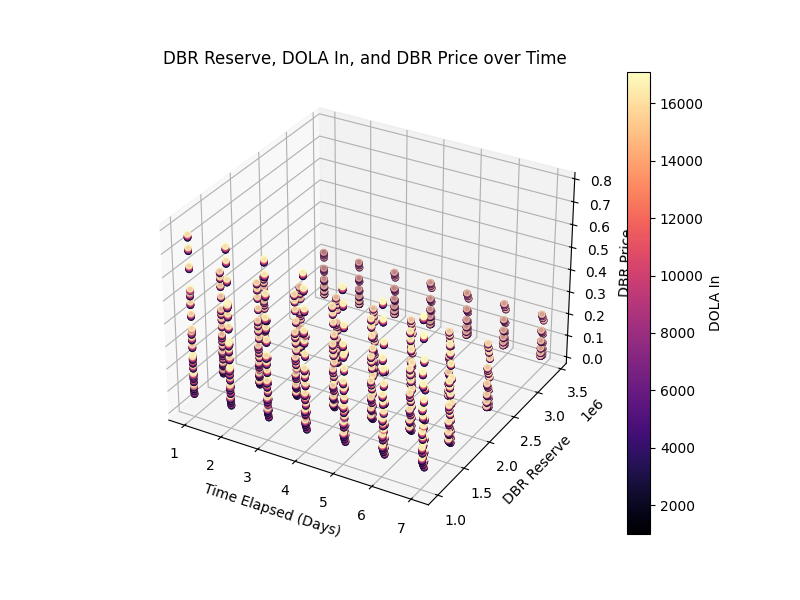

In [8]:
# Chart 5: DBR Reserve, DOLA In, and DBR Price over Time
fig5 = plt.figure(figsize=(8, 6))
ax5 = fig5.add_subplot(111, projection='3d')
scatter5 = ax5.scatter(df['time_elapsed_days'], df['dbr_reserve'], df['dbr_price'], c=df['dola_in'], cmap='magma')
ax5.set_xlabel('Time Elapsed (Days)')
ax5.set_ylabel('DBR Reserve')
ax5.set_zlabel('DBR Price')
plt.colorbar(scatter5, ax=ax5, label='DOLA In')
plt.title('DBR Reserve, DOLA In, and DBR Price over Time')
plt.show()

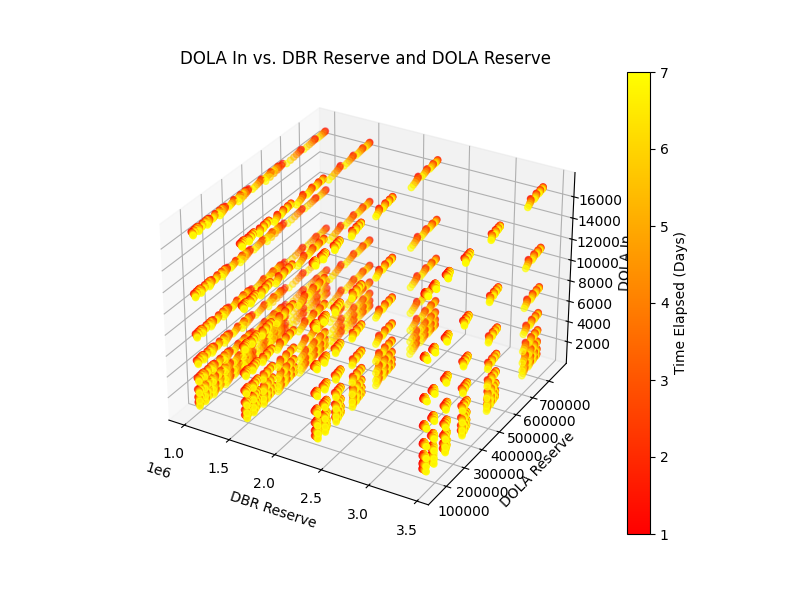

In [9]:
# Chart 6: DOLA In vs. DBR Reserve and DOLA Reserve
fig6 = plt.figure(figsize=(8, 6))
ax6 = fig6.add_subplot(111, projection='3d')
scatter6 = ax6.scatter(df['dbr_reserve'], df['dola_reserve'], df['dola_in'], c=df['time_elapsed_days'], cmap='autumn')
ax6.set_xlabel('DBR Reserve')
ax6.set_ylabel('DOLA Reserve')
ax6.set_zlabel('DOLA In')
plt.colorbar(scatter6, ax=ax6, label='Time Elapsed (Days)')
plt.title('DOLA In vs. DBR Reserve and DOLA Reserve')
plt.show()

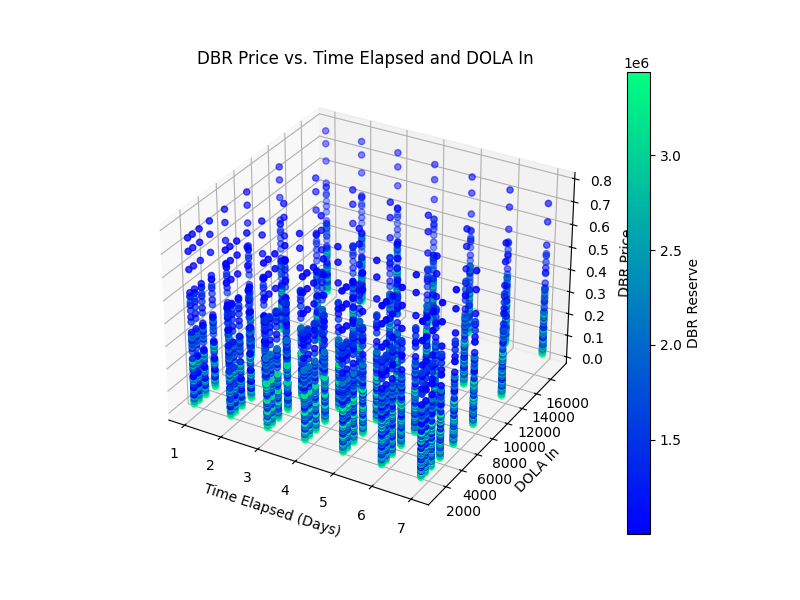

In [10]:
# Chart 7: DBR Price vs. Time Elapsed and DOLA In
fig7 = plt.figure(figsize=(8, 6))
ax7 = fig7.add_subplot(111, projection='3d')
scatter7 = ax7.scatter(df['time_elapsed_days'], df['dola_in'], df['dbr_price'], c=df['dbr_reserve'], cmap='winter')
ax7.set_xlabel('Time Elapsed (Days)')
ax7.set_ylabel('DOLA In')
ax7.set_zlabel('DBR Price')
plt.colorbar(scatter7, ax=ax7, label='DBR Reserve')
plt.title('DBR Price vs. Time Elapsed and DOLA In')
plt.show()

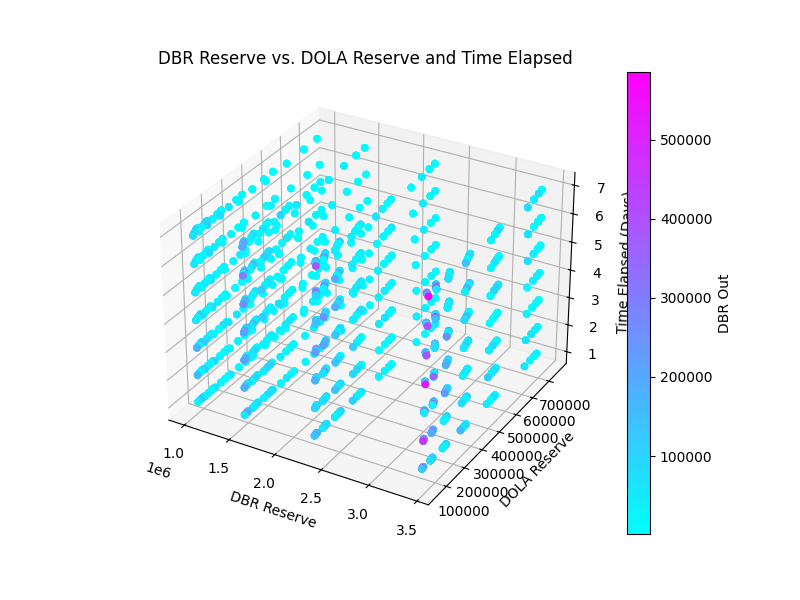

In [11]:
# Chart 8: DBR Reserve vs. DOLA Reserve and Time Elapsed
fig8 = plt.figure(figsize=(8, 6))
ax8 = fig8.add_subplot(111, projection='3d')
scatter8 = ax8.scatter(df['dbr_reserve'], df['dola_reserve'], df['time_elapsed_days'], c=df['dbr_out'], cmap='cool')
ax8.set_xlabel('DBR Reserve')
ax8.set_ylabel('DOLA Reserve')
ax8.set_zlabel('Time Elapsed (Days)')
plt.colorbar(scatter8, ax=ax8, label='DBR Out')
plt.title('DBR Reserve vs. DOLA Reserve and Time Elapsed')
plt.show()